In [1]:
###Based on the Single Variable Linear Regressions that we did. We drop independent variables that have r^2 values less than 0.5.

###For India:
#Pesticide vs Rice Yield. r^2 = 0.19855992378440024

###adj r^2: 0.9284730016330983 (before) => 0.9289758422264148 (after)

In [2]:
###We dropped Urban Pop vs Rice Yield because the Urban Population and Rural Population are clearly correlated.
#Since Total Pop = Urban Pop + Rural Pop

###adj r^2: 0.9284730016330983 (before) => 0.9338101062926916 (after)

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import copy
%run MLR_Functions.ipynb

In [8]:
df_rice_y = pd.read_csv("df_crop_yield.csv")
df_fert_use = pd.read_csv("df_fertilizer_usage.csv")
df_cropland = pd.read_csv("df_cropland.csv")
df_energy = pd.read_csv("df_energy_usage.csv")
df_pop = pd.read_csv("df_urban_rural_pop.csv")
df_water = pd.read_csv("df_water_usage.csv")
#df_pesticide = pd.read_csv("/Users/yxlsa/Desktop/SUTD/DTPIII/Cleaned Data/df_pesticide_usage.csv")
df_pesticide_imports = pd.read_csv("df_pesticide_imports.csv")
df_air_dep = pd.read_csv("df_air_deposition_nitrogen.csv")

In [9]:
df_INDIA = pd.DataFrame()
df_INDIA["Yield"] = df_rice_y["India Rice Yield"]
df_INDIA["Cropland"] = df_cropland["India Crop Land"]
df_INDIA["Energy"] = df_energy["India energy/cropland"]
df_INDIA["Fert"] = df_fert_use["India"]
df_INDIA["Rural Pop"] = df_pop["india rural/total"]
#df_INDIA["Urban Pop"] = df_pop["india urban/total"]
df_INDIA["Water"] = df_water["wf_tot_m3_t_india"]
#df_INDIA["Pesticide"] = df_pesticide["India Pesticide"]
df_INDIA["Pesticide Import"] = df_pesticide_imports["India"]
df_INDIA["Air Deposition of Nitrogen"] = df_air_dep["India Air Deposition of Nitrogen"]

df_INDIA

,Yield,Cropland,Energy,Fert,Rural Pop,Water,Pesticide Import,Air Deposition of Nitrogen
0,2.6125,170109.0000,1.064938,70.650000,0.744253,1398.451456,0.014590,14.0841
1,2.6271,170182.0000,1.238704,74.790000,0.741475,1412.468478,0.010638,14.7304
2,2.6092,170006.0000,1.341016,71.500000,0.738890,1369.645800,0.009107,15.0129
3,2.8303,170286.0000,1.494641,72.729996,0.736265,1290.836077,0.010173,15.2793
4,2.8645,170325.0000,1.676111,79.630000,0.733634,1357.477217,0.025008,15.8310
5,2.6972,169911.0000,1.816452,81.660000,0.731037,1306.269599,0.029018,16.3082
6,2.8226,169525.0000,1.784211,84.570000,0.728560,1350.249762,0.033808,16.8527
7,2.8457,170101.0000,1.931036,95.170000,0.726130,1372.267261,0.021397,17.6312
8,2.8805,170029.0000,2.057896,98.800000,0.723710,1226.596587,0.029740,17.3193
9,2.9782,170125.0000,1.924246,106.130005,0.721314,1296.335443,0.031618,16.3779


In [10]:
# Extract the features and the target
df_features, df_target = get_features_targets(df_INDIA,["Energy","Fert","Rural Pop", "Water", "Pesticide Import", "Air Deposition of Nitrogen"],["Yield"])

# Split the data set into training and test
df_features_train, df_features_test, df_target_train, df_target_test = split_data(df_features, df_target, random_state = 100, test_size = 0.3)

#print(df_features_train)0
#print(df_features_test)

# Normalize the features using z normalization
array_features_train_z, means, stds = normalize_z(df_features_train)

# Change the features and the target to numpy array using the prepare functions

X: np.ndarray = prepare_feature(array_features_train_z)
target: np.ndarray = df_target_train.to_numpy()

iterations: int = 1500
alpha: float = 0.01
beta: np.ndarray = np.zeros((7,1))

# Call the gradient_descent function
beta, J_storage = gradient_descent_linreg(X, target, beta, alpha,iterations)

# call the predict() method
pred: np.ndarray = predict_linreg(df_features_test,beta, means,stds)

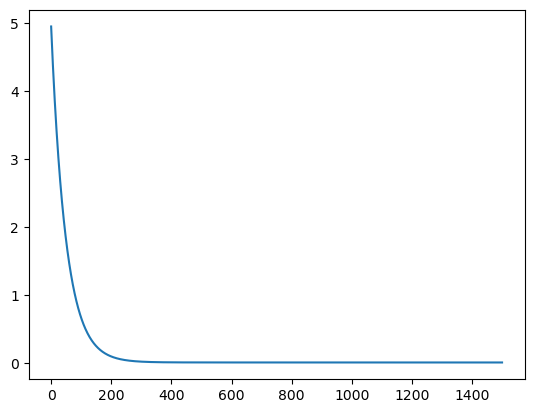

In [11]:
plt.plot(J_storage)

In [15]:
# change target test set to a numpy array
target: np.ndarray = df_target_test.to_numpy()

# Calculate r2 score by calling a function
r2: float = r2_score(target, pred)
    
# Calculate adj r2
#Set the n and k
n = 120
k = 6
adj_r2: float = adj_r_squared(n,k,target,pred)

# Calculate the mse
mse: float = np.mean((target-pred)**2)
    
# Calculate the mae
mae: float = np.mean(np.absolute(target-pred))
    
print(f"r2: {r2}")
print(f"adj_r_squared: {adj_r2}")
print(f"mse: {mse}")
print(f"mae: {mae}")

r2: 0.937147411857766
adj_r_squared: 0.9338101062926916
mse: 0.015491197757645233
mae: 0.09218391245636


In [16]:
print(pred)
print(df_target_test)
print(df_features_test)
print(beta)

[[2.92659239]
 [3.83025409]
 [3.9539601 ]
 [3.03156229]
 [2.84016667]
 [2.9136989 ]
 [3.93541475]
 [3.68503533]
 [2.82480006]]
     Yield
9   2.9782
26  3.7401
28  3.9568
13  3.1177
5   2.6972
12  2.6163
27  3.8639
25  3.6002
6   2.8226
      Energy        Fert  Rural Pop        Water  Pesticide Import  \
9   1.924246  106.130005   0.721314  1296.335443          0.031618   
26  4.156126  153.250000   0.660956   995.647590          0.543529   
28  4.432142  162.200000   0.652498   992.998126          0.681545   
13  1.846421   98.979996   0.708280  1235.403032          0.083700   
5   1.816452   81.660000   0.731037  1306.269599          0.029018   
12  1.788779   94.670006   0.712003  1348.851361          0.040881   
27  4.354506  157.440000   0.656638   962.668027          0.659524   
25  3.680154  157.910000   0.665210  1076.628805          0.443453   
6   1.784211   84.570000   0.728560  1350.249762          0.033808   

    Air Deposition of Nitrogen  
9                      16.377

In [14]:
###13  3.1177
###13  1.846421   98.979996   0.708280   0.283319  1235.403032       0.24          0.083700                     16.4799

country_yield = 3.1177
energy = 1.846421
fert_use = 98.979996
rural_pop = 0.708280
water = 1235.403032
pesticide_imports = 0.083700
air_dep = 16.4799 

def normalise(feature_value:int, mean, std):
    return (feature_value-mean)/std
    

def get_crop_yield(energy, fert_use, rural_pop, water, pesticide_imports, air_dep, beta):
    energy_n = normalise(energy, means[0],stds[0])
    fert_use_n = normalise(fert_use ,means[1],stds[1])
    rural_pop_n = normalise(rural_pop ,means[2],stds[2]) 
    water_n = normalise(water ,means[3],stds[3])
    pesticide_imports_n = normalise(pesticide_imports, means[4],stds[4])
    air_dep_n = normalise(air_dep, means[5],stds[5])
    y = beta[0] + beta[1]*energy_n + beta[2]*fert_use_n + beta[3]*rural_pop_n + beta[4]*water_n + beta[5]*pesticide_imports_n + beta[6]*air_dep_n
    return y

print(get_crop_yield(energy, fert_use, rural_pop, water, pesticide_imports, air_dep, beta))

[3.03156144]
